# Introducing Convolutional Nets

- CIFAR10 Dataset
- A Basic Convolutional Net vs. MLP to start
- Introduce convolutions, convolutional layers, pooling layers etc.
- Overall Architecture

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

### CIFAR10 Dataset

- 60,000 color images in 10 classes, 6,000 images per class
- 50,000 training; 10,000 testing

In [2]:
#Let's get the CIFAR10 dataset
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
#Normalize to between 0 and 1:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [4]:
## Hold out some for validation, just like before:
###########

## All but last 5,000 will be train data; last 5,000 will be validation
X_train, y_train = train_images[:-5000], train_labels[:-5000]

X_valid, y_valid = train_images[-5000:], train_labels[-5000:]

#Rename the test data for consistency:
X_test, y_test = test_images, test_labels

In [5]:
#Shapes?
X_train.shape

(45000, 32, 32, 3)

In [6]:
#Note the labels are a 10000x1 array
y_test.shape

(10000, 1)

In [7]:
#And our class names follow:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


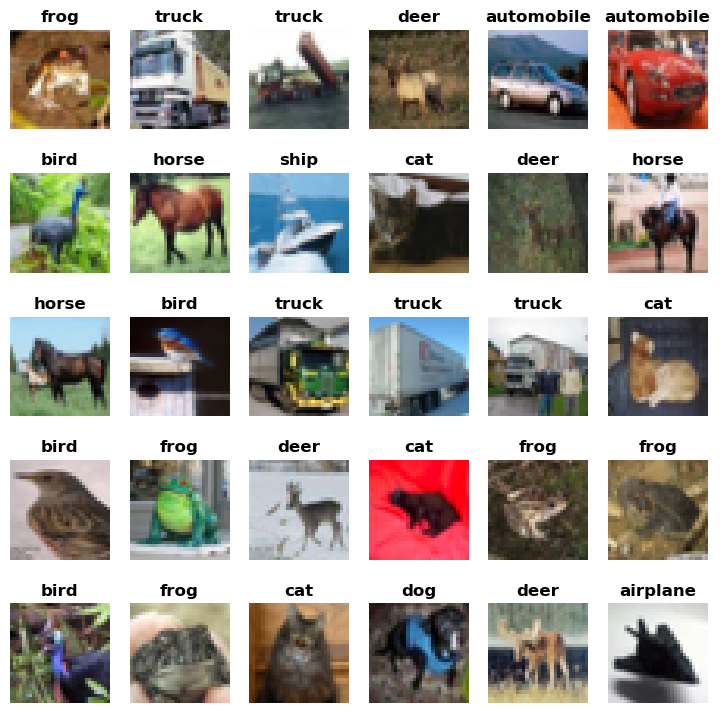

In [8]:
#Finally some new images to plot:
#######

fig1, ax1 = plt.subplots(5, 6, figsize=(9,9))
ax1 = ax1.flatten()

#And plot:
for i in range(30):

    im = ax1[i].imshow(X_train[i])
    
    #Include the class name:
    ax1[i].set_title(class_names[y_train[i][0]], fontweight='bold')
    ax1[i].set_axis_off()
    

### Try an MLP Architecture

In [10]:
## Nice simple Sequential API:
######

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compile the model: Specify loss
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 300)               921900    
                                                                 
 dense_5 (Dense)             (None, 200)               60200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1003210 (3.83 MB)
Trainable params: 1003210 (3.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#Try fitting:
history = model.fit(X_train, y_train, epochs=5,
          validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 11s 7ms/step - loss: 1.8717 - accuracy: 0.3223 - val_loss: 1.8059 - val_accuracy: 0.3438
Epoch 2/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6992 - accuracy: 0.3884 - val_loss: 1.6615 - val_accuracy: 0.3970
Epoch 3/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6158 - accuracy: 0.4190 - val_loss: 1.6284 - val_accuracy: 0.4216
Epoch 4/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5644 - accuracy: 0.4380 - val_loss: 1.5594 - val_accuracy: 0.4452
Epoch 5/5
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5227 - accuracy: 0.4545 - val_loss: 1.5314 - val_accuracy: 0.4548


<Axes: >

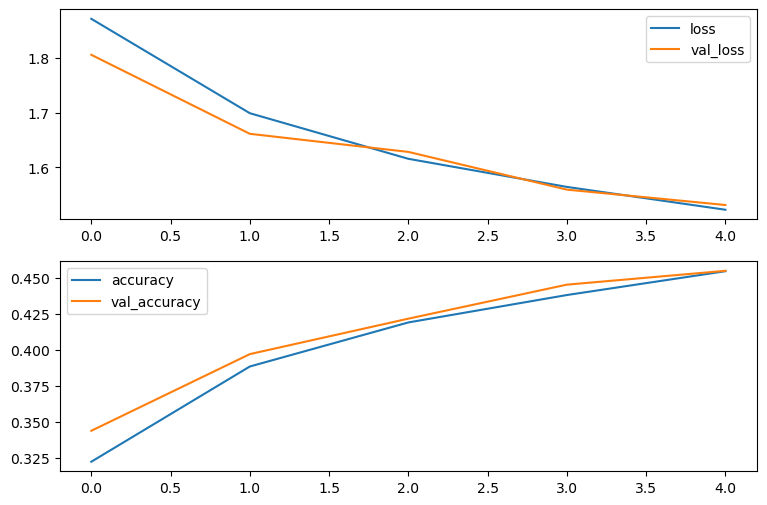

In [13]:
## Plot our history:
df = pd.DataFrame(history.history)

## Plot our history:
fig, ax1 = plt.subplots(2,1, figsize=(9,6))

df[['loss', 'val_loss']].plot(ax=ax1[0])
df[['accuracy', 'val_accuracy']].plot(ax=ax1[1])

### Could Also Try in Grayscale:

- Use `tf.image`:

In [14]:
X_train_grayscale = tf.image.rgb_to_grayscale(X_train)
X_valid_grayscale = tf.image.rgb_to_grayscale(X_valid)

X_train_grayscale.shape

TensorShape([45000, 32, 32, 1])

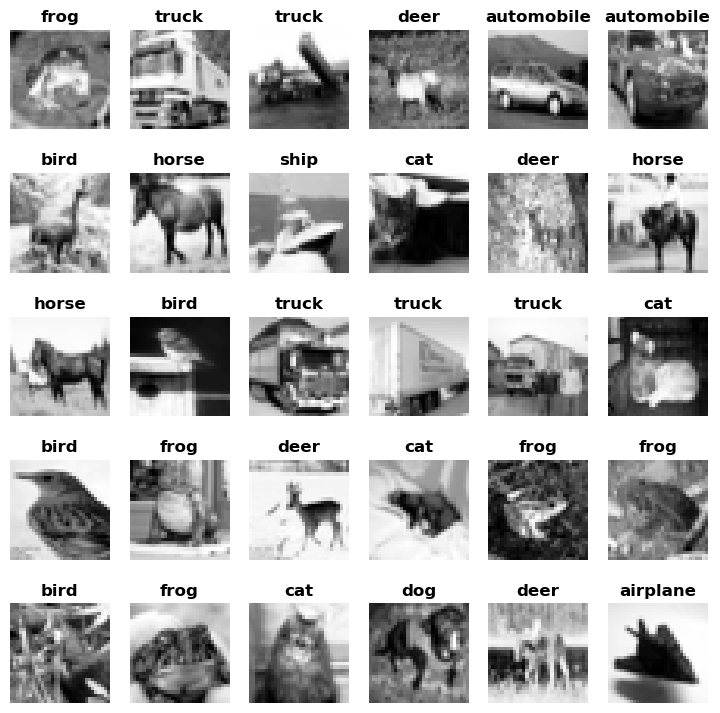

In [15]:
#Plot in grayscale:
#######

fig1, ax1 = plt.subplots(5, 6, figsize=(9,9))
ax1 = ax1.flatten()

#And plot:
for i in range(30):

    im = ax1[i].imshow(X_train_grayscale[i], cmap='Greys_r')
    
    #Include the class name:
    ax1[i].set_title(class_names[y_train[i][0]], fontweight='bold')
    ax1[i].set_axis_off()
    

In [17]:
## And try again with the sequential API:
######

model_gs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compile the model: Specify loss
model_gs.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [18]:
#Try fitting:
history = model_gs.fit(X_train_grayscale, y_train, epochs=5,
          validation_data=(X_valid_grayscale,y_valid))

Epoch 1/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.0304 - accuracy: 0.2583 - val_loss: 1.9322 - val_accuracy: 0.3042
Epoch 2/5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8913 - accuracy: 0.3207 - val_loss: 1.8729 - val_accuracy: 0.3330
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8285 - accuracy: 0.3434 - val_loss: 1.8236 - val_accuracy: 0.3428
Epoch 4/5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7865 - accuracy: 0.3588 - val_loss: 1.8199 - val_accuracy: 0.3400
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7501 - accuracy: 0.3750 - val_loss: 1.7801 - val_accuracy: 0.3624


<Axes: >

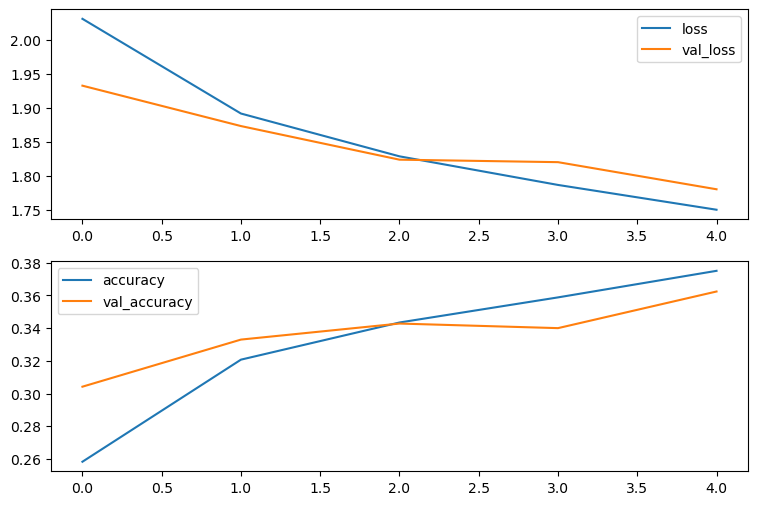

In [19]:
## Plot our history now:
df = pd.DataFrame(history.history)

## Plot our history:
fig, ax1 = plt.subplots(2,1, figsize=(9,6))

df[['loss', 'val_loss']].plot(ax=ax1[0])
df[['accuracy', 'val_accuracy']].plot(ax=ax1[1])

## Vs. Minimal CNN:

In [20]:
#Set up base convolutional stuff:
#########

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')
])


In [21]:
##Add Dense layer at top, plus output:
#####

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))


In [22]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [23]:
##And compile:
model_cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


In [24]:
#Try fitting this one:
history = model_cnn.fit(X_train, y_train, epochs=5,
          validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5750 - accuracy: 0.4244 - val_loss: 1.4626 - val_accuracy: 0.4700
Epoch 2/5
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2533 - accuracy: 0.5531 - val_loss: 1.1417 - val_accuracy: 0.5882
Epoch 3/5
1407/1407 [==============================] - 16s 12ms/step - loss: 1.0908 - accuracy: 0.6157 - val_loss: 1.0355 - val_accuracy: 0.6422
Epoch 4/5
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9831 - accuracy: 0.6537 - val_loss: 1.0328 - val_accuracy: 0.6404
Epoch 5/5
1407/1407 [==============================] - 16s 11ms/step - loss: 0.8986 - accuracy: 0.6853 - val_loss: 1.0168 - val_accuracy: 0.6412


In [25]:
### Check some predictions:
#############


In [26]:
preds = np.argmax(model_cnn.predict(X_valid[0:10]), axis=1)
preds

1/1 [==============================] - 0s 81ms/step


array([7, 1, 4, 1, 0, 2, 2, 5, 9, 6], dtype=int64)

In [27]:
[class_names[i] for i in preds]

['horse',
 'automobile',
 'deer',
 'automobile',
 'airplane',
 'bird',
 'bird',
 'dog',
 'truck',
 'frog']

In [28]:
#Correct?
preds == y_valid[0:10].reshape(-1,)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [29]:
[class_names[i] for i in y_valid[0:10].reshape(-1,)]

['horse',
 'automobile',
 'deer',
 'automobile',
 'airplane',
 'bird',
 'bird',
 'dog',
 'truck',
 'frog']

In [30]:
y_valid[0:10].reshape(-1,)

array([7, 1, 4, 1, 0, 2, 2, 5, 9, 6], dtype=uint8)

## So what are these new layers doing???

- See board...

## Some Notions in Schema:

### Filters/Receptive Fields + Zero-Padding:

<img src="cnn1.png" alt="Stride" style="width:425px;"/>


### Stride:

<img src="cnn2.png" alt="Stride" style="width:425px;"/>

### Overall Flow Through Convolutional Layers:

<img src="cnn6.png" alt="Stride" style="width:525px;"/>

### Let's do a 1-D Convolution for Practice:

0     1.284025
1     1.000000
2     0.778801
3     0.606531
4     0.472367
5     0.367879
6     0.286505
7     0.223130
8     0.173774
9     0.135335
10    0.105399
11    0.082085
12    0.063928
13    0.049787
14    0.038774
15    0.030197
16    0.023518
17    0.018316
18    0.014264
19    0.011109
dtype: float64

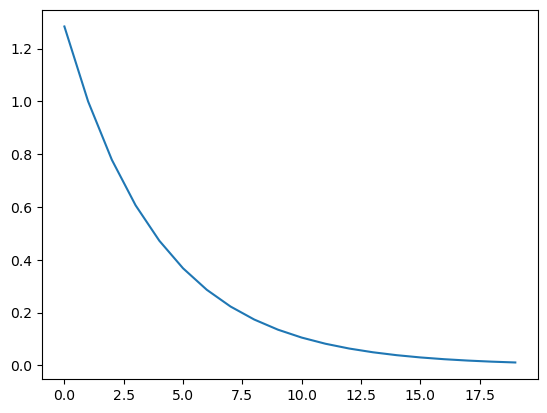

In [146]:
#K will be our kernel/filter:
#"Finite-memory"
#Make a "Leaky integrator"
K_val = np.exp(.25*np.arange(1,-19,-1)) #np.array([5, 2, .5, .1, .01])

#Our associated indexing?
K_index = np.array(range(20))

plt.plot(K_index, K_val)

#Make a Series:
K = pd.Series(K_val, index=K_index)
K

<StemContainer object of 3 artists>

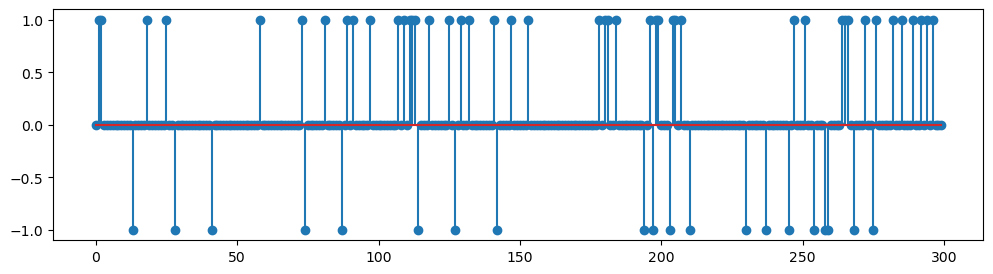

In [147]:
#Input signal:
#Make it a point-process:

N = 300

x = np.zeros([N,])

#Positive:
i = np.random.choice(N, 50, replace=False)
x[i] = 1

#Could also do negative:
i = np.random.choice(N, 20, replace=False)
x[i] = -1

#Or normal noise:
#x = np.random.normal(0, 1, N)

fig1, ax1 = plt.subplots(1, 1, figsize=(12,3))
ax1.stem(x)

In [148]:
### Now we need to convolve:

#Loop through every point in signal:
###

y = np.zeros([N,])
##Could also start 20 in, to avoid zero-padding bookkeeping:
for n in range(0, N):
    #We know memory extent, so can limit for loop:
    for m in range(0, 20):
        
        #Simplistic zero-padding:
        if (n-m < 0):
            y[n] += K.loc[m] * 0
        else:
            y[n] += K.loc[m] * x[n-m]

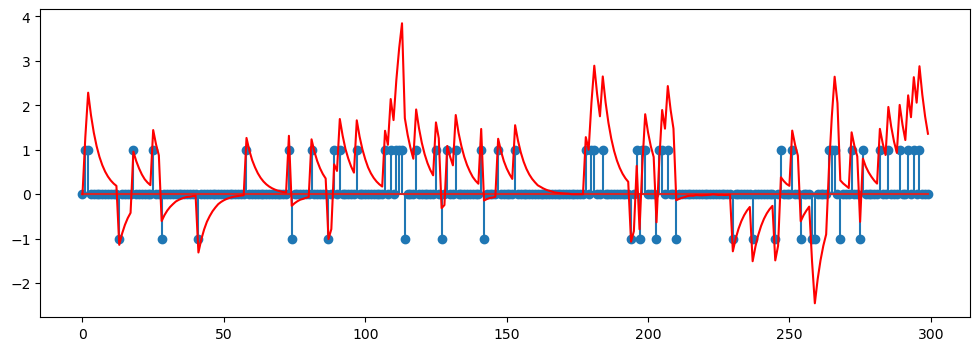

In [149]:
fig1, ax1 = plt.subplots(1, 1, figsize=(12,4))

ax1.stem(x)
ax1.plot(y, color='red')

## Make a Convolutional Layer in Keras

- Let's get a couple other images to work with:

In [150]:
#Get two simple images:
#######

from sklearn.datasets import load_sample_images

images = load_sample_images()['images']

In [151]:
## Rescale:
images = tf.keras.layers.Rescaling(scale = 1/255)(images)

## CenterCrop to 400x400:
images = tf.keras.layers.CenterCrop(height=400, width=400)(images)

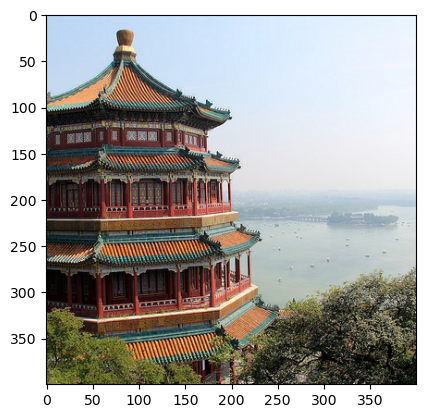

In [152]:
plt.imshow(images[0])

In [153]:
#Shape of images:
images.shape

TensorShape([2, 400, 400, 3])

In [156]:
#Make a Convolutional Layer:
###
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7)) #Or just 7

#And make the feature maps: = output of layer
fmaps = conv_layer(images)

#Note shape of fmaps:
#We have 32 feature maps, and are down to 394x394, since no zero-padding by default
fmaps.shape

TensorShape([2, 394, 394, 32])

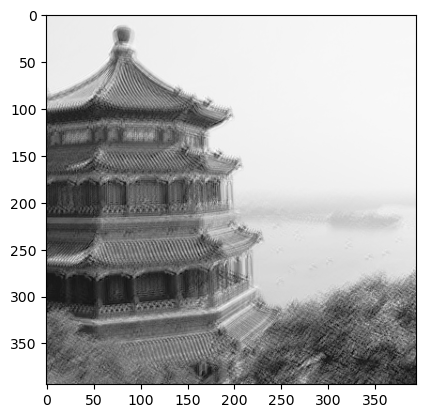

In [164]:
#Note we can plot the feature maps:
plt.imshow(fmaps[0,:,:,0].numpy(), cmap="Greys_r")

In [165]:
##To pad with enough zeros to get same size at input:
#####

conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7),
                                    padding="same")
fmaps = conv_layer(images)

fmaps.shape

TensorShape([2, 400, 400, 32])

#### Zero-padding:

<img src="stride_scheme.png" alt="Stride" style="width:525px;"/>

In [166]:
## Add a stride:
###

conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7),
                                    padding="same",
                                    strides=(2,2))
fmaps = conv_layer(images)

fmaps.shape

TensorShape([2, 200, 200, 32])

#### Note effect of stride on output shape:

<img src="stride_scheme.png" alt="Stride" style="width:525px;"/>

#### Check out the weights/biases:

- Note that the number of weights depends only on the filter size: We can pass an image of any size to this layer and get an output!

In [167]:
#Grab weights/biases
weights, biases = conv_layer.get_weights()

In [168]:
#7x7 receptive field, 3 channels: RGB, and 32 feature maps:
weights.shape

(7, 7, 3, 32)

In [169]:
#32 feature maps:
biases.shape

(32,)

### Filters from Conv2D Above?

- Let's visualize the filters from `model_cnn` above:

In [170]:
#Grab the weights:

weights, biases = model_cnn.layers[0].get_weights()
weights.shape

(5, 5, 3, 32)

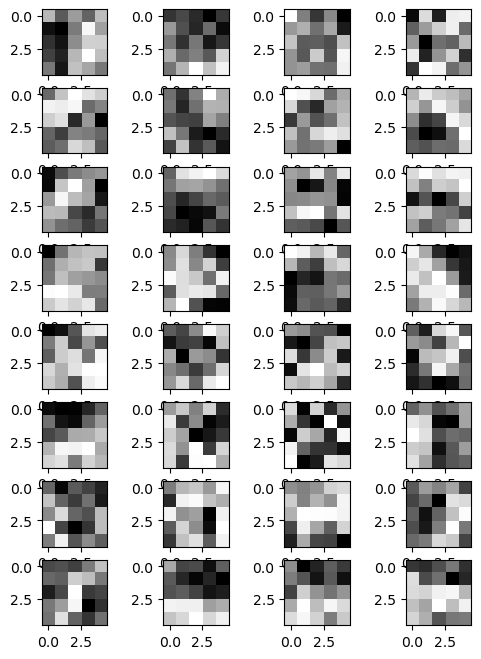

In [171]:
##Plot some:

fig1, ax1 = plt.subplots(8, 4, figsize=(6,8))
ax1 = ax1.flatten()

for i in range(32):
    
    ax1[i].imshow(weights[:,:,0,i], cmap='Greys')

### Use Conv2D to Apply Our Own Filters:

Let's convert to grayscale, and impose a filter:

In [172]:
#Grayscale conversion: 
images_gs = tf.image.rgb_to_grayscale(images)

In [173]:
images_gs.shape

TensorShape([2, 400, 400, 1])

In [179]:
#My convolution layer: No bias
edge_layer_x = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), input_shape=(400,400),
                                    padding="same", use_bias=False)

In [185]:
#Initialize:
edge_layer_x(images_gs)
#vs:
#edge_layer_x.build(input_shape=(400,400,1))

<tf.Tensor: shape=(2, 400, 400, 1), dtype=float32, numpy=
array([[[[ 2.4428024e+00],
         [ 3.9211512e-03],
         [ 1.1299849e-03],
         ...,
         [-6.9481730e-03],
         [ 5.9604645e-08],
         [-2.8707345e+00]],

        [[ 3.2581997e+00],
         [ 1.2893438e-02],
         [ 6.1808825e-03],
         ...,
         [-3.4741163e-03],
         [ 0.0000000e+00],
         [-3.8202507e+00]],

        [[ 3.2593298e+00],
         [ 1.7944455e-02],
         [ 1.7944336e-02],
         ...,
         [-3.9212704e-03],
         [-3.9210916e-03],
         [-3.8054600e+00]],

        ...,

        [[ 1.3976572e+00],
         [-4.7805649e-01],
         [ 5.0646204e-01],
         ...,
         [-6.0207449e-02],
         [-1.3581529e-01],
         [-2.4037650e-01]],

        [[ 1.4237460e+00],
         [ 3.0482411e-02],
         [ 4.2673960e-01],
         ...,
         [-4.7930211e-02],
         [-1.4960274e-01],
         [-2.4421963e-01]],

        [[ 9.4540286e-01],
         [ 

In [186]:
#Weights?
edge_layer_x.get_weights()[0].shape

(3, 3, 1, 1)

In [187]:
# Let's make our own:
my_filter = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

#Expand this to 3,3,1,1 shape:
my_filter = np.expand_dims(my_filter, (2,3))

my_filter.shape

(3, 3, 1, 1)

In [188]:
#Finally, set the weights:
###

edge_layer_x.set_weights([my_filter])

In [190]:
#Confirm:
edge_layer_x.get_weights()

[array([[[[-1.]],
 
         [[ 0.]],
 
         [[ 1.]]],
 
 
        [[[-2.]],
 
         [[ 0.]],
 
         [[ 2.]]],
 
 
        [[[-1.]],
 
         [[ 0.]],
 
         [[ 1.]]]], dtype=float32)]

In [191]:
##Do same for y:
edge_layer_y = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), input_shape=(400,400),
                                    padding="same", use_bias=False)

#Initialize:
edge_layer_y(images_gs)

# Let's make our own:
my_filter = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]])

#Expand this to 3,3,1,1 shape:
my_filter = np.expand_dims(my_filter, (2,3))

edge_layer_y.set_weights([my_filter])

In [192]:
##And a Laplacian:
edge_layer_lap = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), input_shape=(400,400),
                                    padding="same", use_bias=False)

#Initialize:
edge_layer_lap(images_gs)

# Laplacian Filter:
my_filter = np.array([[0, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 0]])

#Expand this to 3,3,1,1 shape:
my_filter = np.expand_dims(my_filter, (2,3))

edge_layer_lap.set_weights([my_filter])

In [193]:
## And filter!
##############
images_filtered_x = edge_layer_x(images_gs)
images_filtered_y = edge_layer_y(images_gs)
images_filtered_lap = edge_layer_lap(images_gs)

In [194]:
images_filtered_x.shape

TensorShape([2, 400, 400, 1])

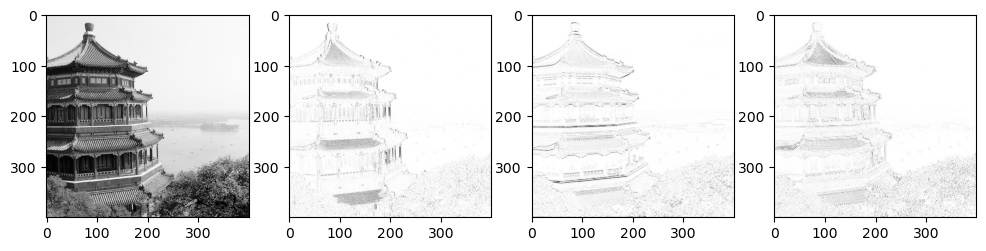

In [195]:
#Plot results:
########

fig1, ax1 = plt.subplots(1, 4, figsize=(12,4))
ax1 = ax1.flatten()

image_index = 0

ax1[0].imshow(images_gs[image_index], cmap='Greys_r')
ax1[1].imshow(np.abs(images_filtered_x[image_index]), cmap='Greys')
ax1[2].imshow(np.abs(images_filtered_y[image_index]), cmap='Greys')
ax1[3].imshow(np.abs(images_filtered_lap[image_index]), cmap='Greys')

### Pooling Layers:

- Pooling layers also have a receptive field
- Typically have stride > 1, otherwise would just be identity function
- No weights/filter, simply apply an aggregation function to the field
- Most typical is MAX, can also use Average

**Advantages:**

- Reduces parameters
- Highlights part of image that activates filters most strongly
- Weakly invariant to translations, rotations: Good for classification tasks!

<img src="cnn4.png" alt="Pooling" style="width:475px;"/>

**Disadvantages:**

- Lose some information
- Don't always want invariance to shifts, e.g. for semantic segmentation

In [196]:
### Can apply a MaxPool2D Layer directly to the input image:

max_pool = tf.keras.layers.MaxPooling2D((4, 4))

pooled = max_pool(images)

pooled.shape

TensorShape([2, 100, 100, 3])

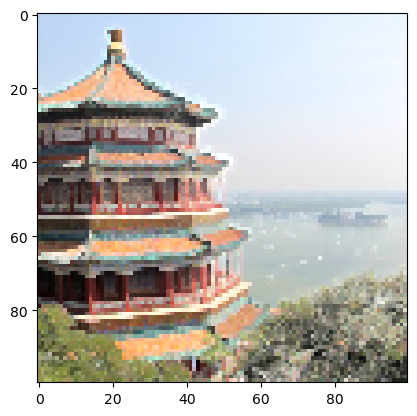

In [197]:
#Plot:
plt.imshow(pooled[0])

## Typical CNN Architectures

- After we have extracted the high-order feature maps, we finally pass this information to one or more dense layers: Idea is we still need to perform classification task.

- (Hopefully) we now know enough about convolutions, convolutional layers, and pooling layers to understand a typical architecture:

<br>

<img src="cnn5.png" alt="CNN" style="width:525px;"/>

- Note that receptive field can be larger for first layer, but is typically 3x3 for higher layers

- Image gets smaller but deeper (more feature maps) as we proceed through the net

## Example: LeNet-5 Architecture

Layer  | Type            | Maps | Size     | Kernel size | Stride | Activation
-------|-----------------|------|----------|-------------|--------|-----------
 Out   | Fully connected | –    | 10       | –           | –      | RBF
 F6    | Fully connected | –    | 84       | –           | –      | tanh
 C5    | Convolution     | 120  | 1 × 1    | 5 × 5       | 1      | tanh
 S4    | Avg pooling     | 16   | 5 × 5    | 2 × 2       | 2      | tanh
 C3    | Convolution     | 16   | 10 × 10  | 5 × 5       | 1      | tanh
 S2    | Avg pooling     | 6    | 14 × 14  | 2 × 2       | 2      | tanh
 C1    | Convolution     | 6    | 28 × 28  | 5 × 5       | 1      | tanh
 In    | Input           | 1    | 32 × 32  | –           | –      | –
 